In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import abline_plot

# Finns and Alcohol Consumption: Do Seasonal Changes in Weather Affect Our Drinking Habits? 
### Sini Suihkonen, Outi Savolainen and Fanni Franssila

In [2]:
def load_xls(file_name:str, year: int):
    dataframes = []
    months = ["Tammi", "Helmi", "Maalis", "Huhti", "Touko", "Kesä", "Heinä", "Elo", "Syys", "Loka", "Marras", "Joulu"]
    months_eng = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    xls = pd.ExcelFile(file_name)
    for (i, month) in enumerate(months):
        name_of_sheet = f"{month}kuu {year}"
        df = pd.read_excel(xls, name_of_sheet,skiprows=[0,1,2], usecols=("I"))
        # Add month column to the dataframe. For example "Tammikuu2020".
        df[i+1] = pd.concat([df.iloc[3:4], df.iloc[14:15], df.iloc[21:22], df.iloc[34:35], df.iloc[35:36]])
        # Drop rows with NaNs. After this we have only four rows containing total consumption for all types of alchohol.
        df = df.dropna()
        # Remove the first useless row of the dataframe.
        df = df.iloc[:, 1:]
        # Change index names
        df = df.rename(index={3:"Beer", 14:"Wine", 21:"Strong Wine", 34:"Spirits", 35:"Total"})
        dataframes.append(df)
    total = pd.concat(dataframes, axis=1)
    
    return total.T.astype(int)

alc_data2020 = load_xls("Alkoholimyyntitilasto_tammi_joulukuu_2020.xlsx", 2020)
alc_data2019 = load_xls("Alkoholimyyntitilasto_tammi_joulukuu_2019.xlsx", 2019)
alc_data2018 = load_xls("Alkoholimyyntitilasto_tammi_joulukuu_2018.xlsx", 2018)
alc_data2017 = load_xls("Alkoholimyyntitilasto_tammi_joulukuu_2017.xlsx", 2017)

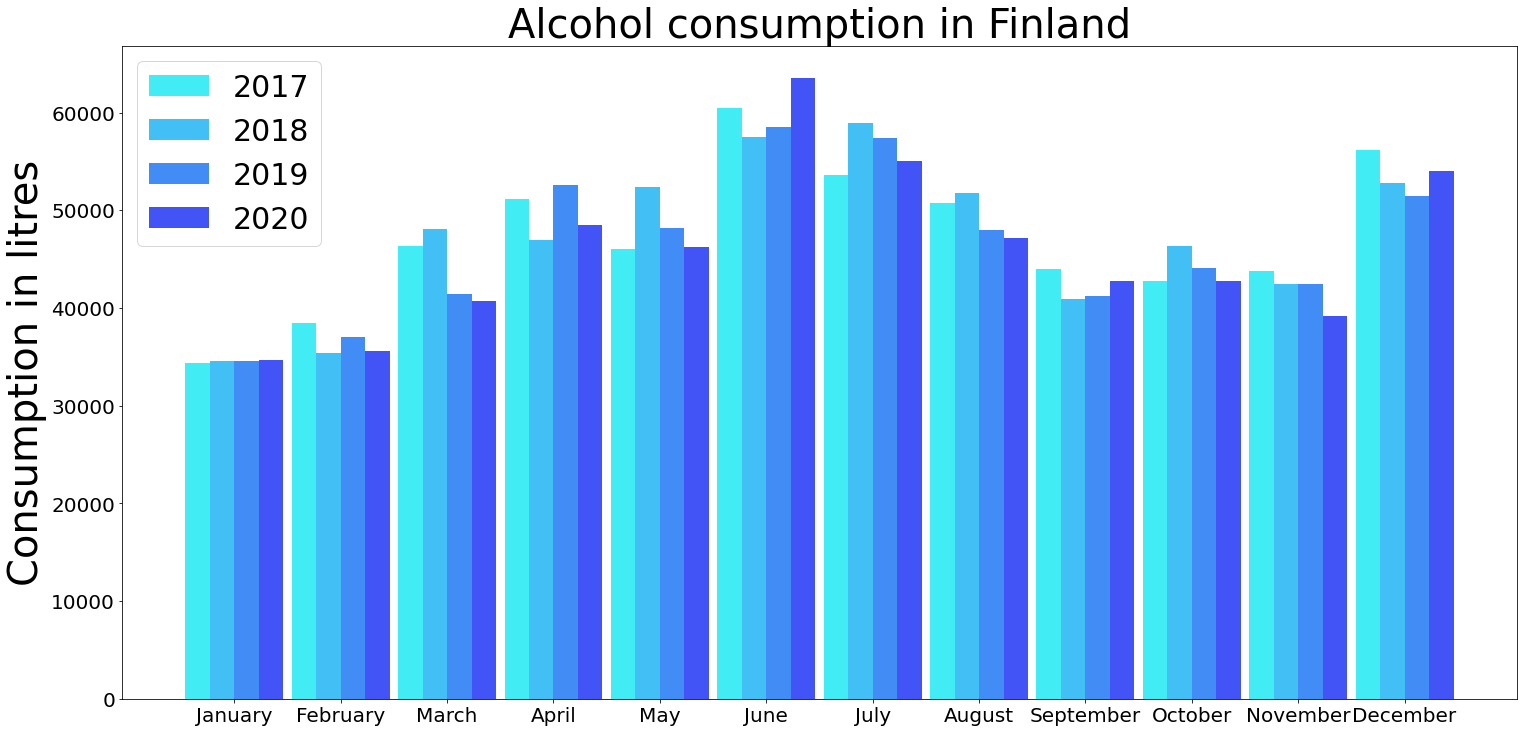

In [3]:
# Total plotting
labels = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
beer2020 = alc_data2020["Total"].values
beer2019 = alc_data2019["Total"].values
beer2018 = alc_data2018["Total"].values
beer2017 = alc_data2017["Total"].values

width = 0.23
bar1 = np.arange(len(labels))
bar2 = [i + width  for i in bar1]
bar3 = [i + width  for i in bar2]
bar4 = [i + width  for i in bar3]

plt.figure(figsize=(25,12))

plt.bar(bar1, beer2017, width, label="2017", color="#42ecf5")
plt.bar(bar2, beer2018, width, label="2018", color="#42bff5")
plt.bar(bar3, beer2019, width, label="2019", color="#428df5")
plt.bar(bar4, beer2020, width, label="2020", color="#4254f5")



plt.ylabel("Consumption in litres", fontsize=40)
plt.title("Alcohol consumption in Finland", fontsize=40)
plt.xticks(bar1 + 3*width/2, labels, fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=30)

plt.show()

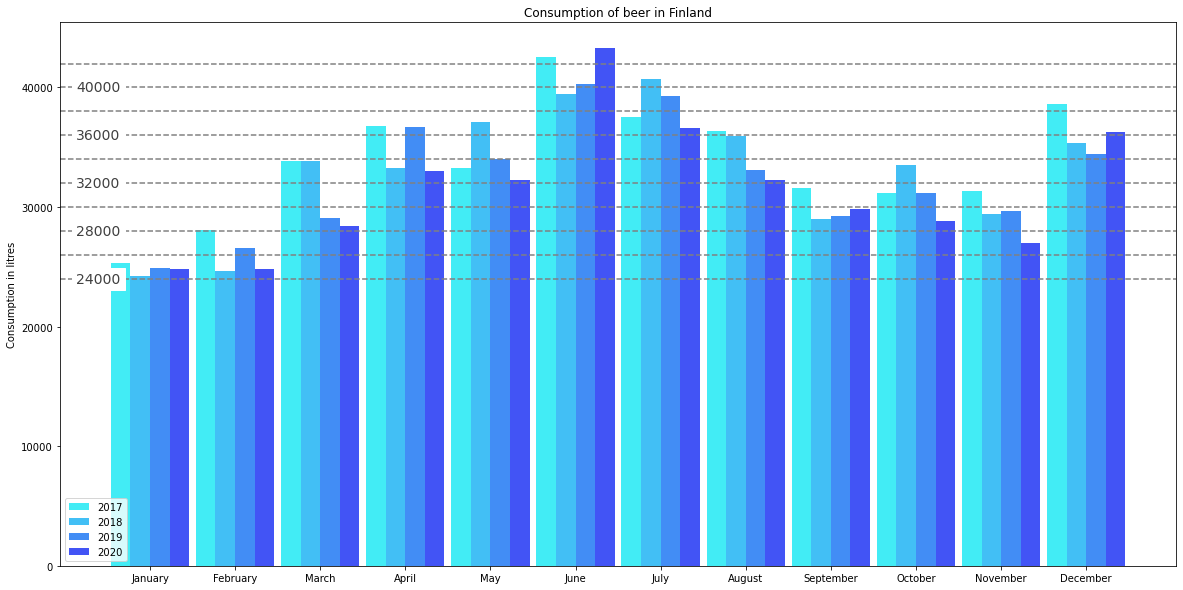

In [4]:
# Be(tt)er plotting
labels = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
beer2020 = alc_data2020["Beer"].values
beer2019 = alc_data2019["Beer"].values
beer2018 = alc_data2018["Beer"].values
beer2017 = alc_data2017["Beer"].values

width = 0.23
bar1 = np.arange(len(labels))
bar2 = [i + width  for i in bar1]
bar3 = [i + width  for i in bar2]
bar4 = [i + width  for i in bar3]

plt.figure(figsize=(20,10))

plt.bar(bar1, beer2017, width, label="2017", color="#42ecf5")
plt.bar(bar2, beer2018, width, label="2018", color="#42bff5")
plt.bar(bar3, beer2019, width, label="2019", color="#428df5")
plt.bar(bar4, beer2020, width, label="2020", color="#4254f5")

for i in range(24000, 43000, 2000):
  plt.axhline(y=i, color="grey", linestyle="--")
  if i % 4000 == 0:
    plt.text(x=0,y=i, s=str(i), fontsize=14, va='center', ha='right', backgroundcolor='w', alpha=0.75)

plt.ylabel("Consumption in litres")
plt.title("Consumption of beer in Finland")
plt.xticks(bar1 + 3*width/2, labels)
plt.legend()

plt.show()

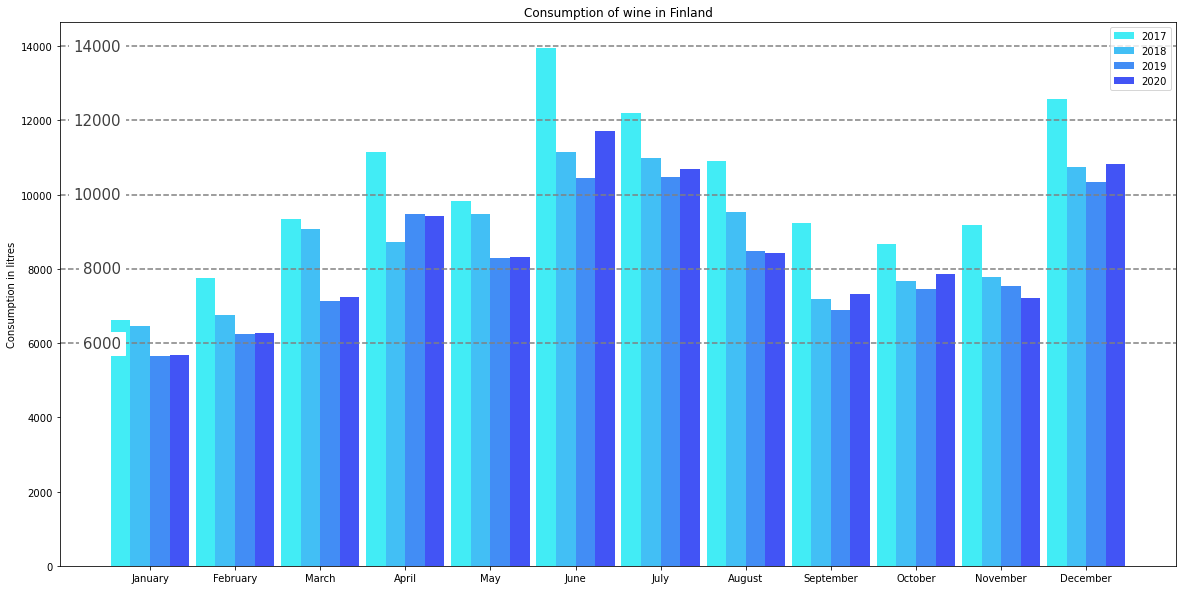

In [5]:
# Wine plotting
wine2020 = alc_data2020["Wine"].values
wine2019 = alc_data2019["Wine"].values
wine2018 = alc_data2018["Wine"].values
wine2017 = alc_data2017["Wine"].values

plt.figure(figsize=(20,10))

plt.bar(bar1, wine2017, width, label="2017", color="#42ecf5")
plt.bar(bar2, wine2018, width, label="2018", color="#42bff5")
plt.bar(bar3, wine2019, width, label="2019", color="#428df5")
plt.bar(bar4, wine2020, width, label="2020", color="#4254f5")

for i in range(6000, 15000, 2000):
  plt.axhline(y=i, color="grey", linestyle="--")
  plt.text(x=0,y=i, s=str(i), fontsize=15, va='center', ha='right',backgroundcolor='w', alpha=0.75)

plt.ylabel("Consumption in litres")
plt.title("Consumption of wine in Finland")
plt.xticks(bar1 + 3*width/2, labels)
plt.legend()

plt.show()

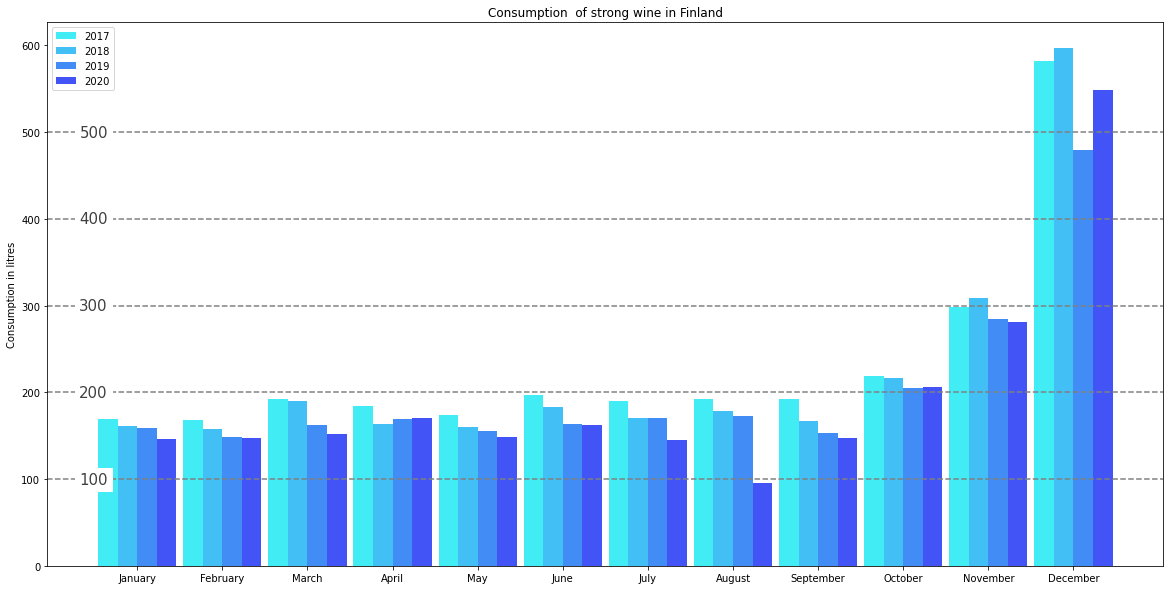

In [6]:
# Wine plotting
s_wine2020 = alc_data2020["Strong Wine"].values
s_wine2019 = alc_data2019["Strong Wine"].values
s_wine2018 = alc_data2018["Strong Wine"].values
s_wine2017 = alc_data2017["Strong Wine"].values

plt.figure(figsize=(20,10))

plt.bar(bar1, s_wine2017, width, label="2017", color="#42ecf5")
plt.bar(bar2, s_wine2018, width, label="2018", color="#42bff5")
plt.bar(bar3, s_wine2019, width, label="2019", color="#428df5")
plt.bar(bar4, s_wine2020, width, label="2020", color="#4254f5")

for i in range(100, 600, 100):
  plt.axhline(y=i, color="grey", linestyle="--")
  plt.text(x=0,y=i, s=str(i), fontsize=15, va='center', ha='right', backgroundcolor='w', alpha=0.75)

plt.ylabel("Consumption in litres")
plt.title("Consumption  of strong wine in Finland")
plt.xticks(bar1 + 3*width/2, labels)
plt.legend()

plt.show()

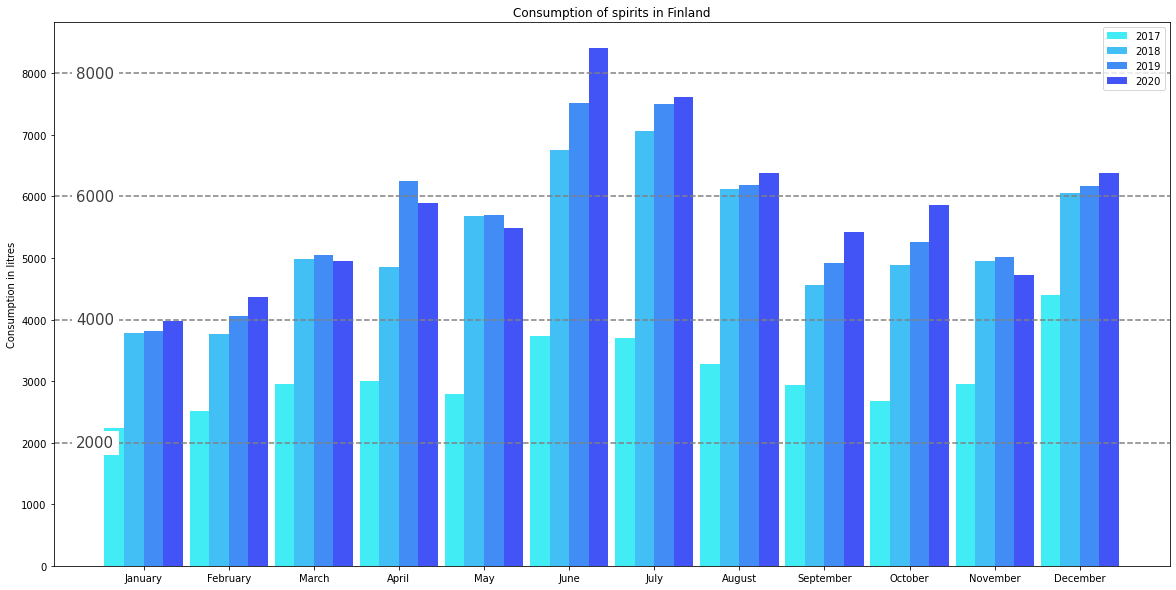

In [7]:
# Wine plotting
spirits2020 = alc_data2020["Spirits"].values
spirits2019 = alc_data2019["Spirits"].values
spirits2018 = alc_data2018["Spirits"].values
spirits2017 = alc_data2017["Spirits"].values

plt.figure(figsize=(20,10))

plt.bar(bar1, spirits2017, width, label="2017", color="#42ecf5")
plt.bar(bar2, spirits2018, width, label="2018", color="#42bff5")
plt.bar(bar3, spirits2019, width, label="2019", color="#428df5")
plt.bar(bar4, spirits2020, width, label="2020", color="#4254f5")

for i in range(2000, 9000, 2000):
  plt.axhline(y=i, color="grey", linestyle="--")
  plt.text(x=0,y=i, s=str(i), fontsize=15, va='center', ha='right', backgroundcolor='w', alpha=0.75)

plt.ylabel("Consumption in litres")
plt.title("Consumption of spirits in Finland")
plt.xticks(bar1 + 3*width/2, labels)
plt.legend()

plt.show()

In [8]:
# WEATHER DATA
def load_csv(file_name:str):
    df_weather = pd.read_csv(file_name)

    # replace negative snow depth values
    df_weather["Lumensyvyys (cm)"].replace({-1: 0}, inplace=True)

    # Translate relevant column names into English
    df_weather = df_weather.rename(columns={"Kk": "Month", "Pilvien määrä (1/8)": "Cloud cover (1/8)", "Ilmanpaine (msl) (hPa)": "Air pressure(msl) (hPa)",
                                        "Sademäärä (mm)": "Precipitation (mm)", "Lumensyvyys (cm)": "Snow depth (cm)", "Ilman lämpötila (degC)": "Air temperature (degC)",
                                        "Tuulen nopeus (m/s)": "Wind speed (m/s)"})

    # Some random values were missing. Filling method 
    # ffill: propagate last valid observation forward to next valid backfill 
    df_weather = df_weather.fillna(method="ffill")
    
    #count column means by month
    df_mean = df_weather.groupby("Month").mean()

    # drop year and day column
    df_mean = df_mean.iloc[: , 2:]
    

    # limit columns here 
    col = [0,1,2,5,6,11] 
    df_mean = df_mean.iloc[:,col]

    return df_mean

# SUN DATA
def load_sun_csv(file_name:str):
    df_sun = pd.read_csv(file_name, sep=",")

    # Drop the time zone, year, day and time of day
    df_sun = df_sun.drop(["Aikavyöhyke", "Vuosi", "Pv", "Klo"], axis=1)

    # Translate column names into English
    df_sun = df_sun.rename(columns={"Kk": "Month", "Paisteaika (s)": "Sunshine duration (s/min)"})

    # Take monthly mean for sunlight
    df_sun = df_sun.groupby("Month").mean()

    return df_sun
    
#Jyväskylä - Airport
weatherdata_JYV_2020 = load_csv("weather2020-JYV.csv")
weatherdata_JYV_2020 = weatherdata_JYV_2020.merge(load_sun_csv("sun2020-JYV.csv"), on="Month")
weatherdata_JYV_2019 = load_csv("weather2019-JYV.csv")
weatherdata_JYV_2019 = weatherdata_JYV_2019.merge(load_sun_csv("sun2019-JYV.csv"), on="Month")
weatherdata_JYV_2018 = load_csv("weather2018-JYV.csv")
weatherdata_JYV_2018 = weatherdata_JYV_2018.merge(load_sun_csv("sun2018-JYV.csv"), on="Month")
weatherdata_JYV_2017 = load_csv("weather2017-JYV.csv")
weatherdata_JYV_2017 = weatherdata_JYV_2017.merge(load_sun_csv("sun2017-JYV.csv"), on="Month")

#Helsinki - Kumpula
weatherdata_HEL_2020 = load_csv("weather2020-HEL.csv")
weatherdata_HEL_2020 = weatherdata_HEL_2020.merge(load_sun_csv("sun2020-HEL.csv"), on="Month")
weatherdata_HEL_2019 = load_csv("weather2019-HEL.csv")
weatherdata_HEL_2019 = weatherdata_HEL_2019.merge(load_sun_csv("sun2019-HEL.csv"), on="Month")
weatherdata_HEL_2018 = load_csv("weather2018-HEL.csv")
weatherdata_HEL_2018 = weatherdata_HEL_2018.merge(load_sun_csv("sun2018-HEL.csv"), on="Month")
weatherdata_HEL_2017 = load_csv("weather2017-HEL.csv")
weatherdata_HEL_2017 = weatherdata_HEL_2017.merge(load_sun_csv("sun2017-HEL.csv"), on="Month")

#Oulu - Pellonpää
weatherdata_OULU_2020 = load_csv("weather2020-OULU.csv")
weatherdata_OULU_2019 = load_csv("weather2019-OULU.csv")
weatherdata_OULU_2018 = load_csv("weather2018-OULU.csv")
weatherdata_OULU_2017 = load_csv("weather2017-OULU.csv")
#weatherdata_HEL_2020.head()

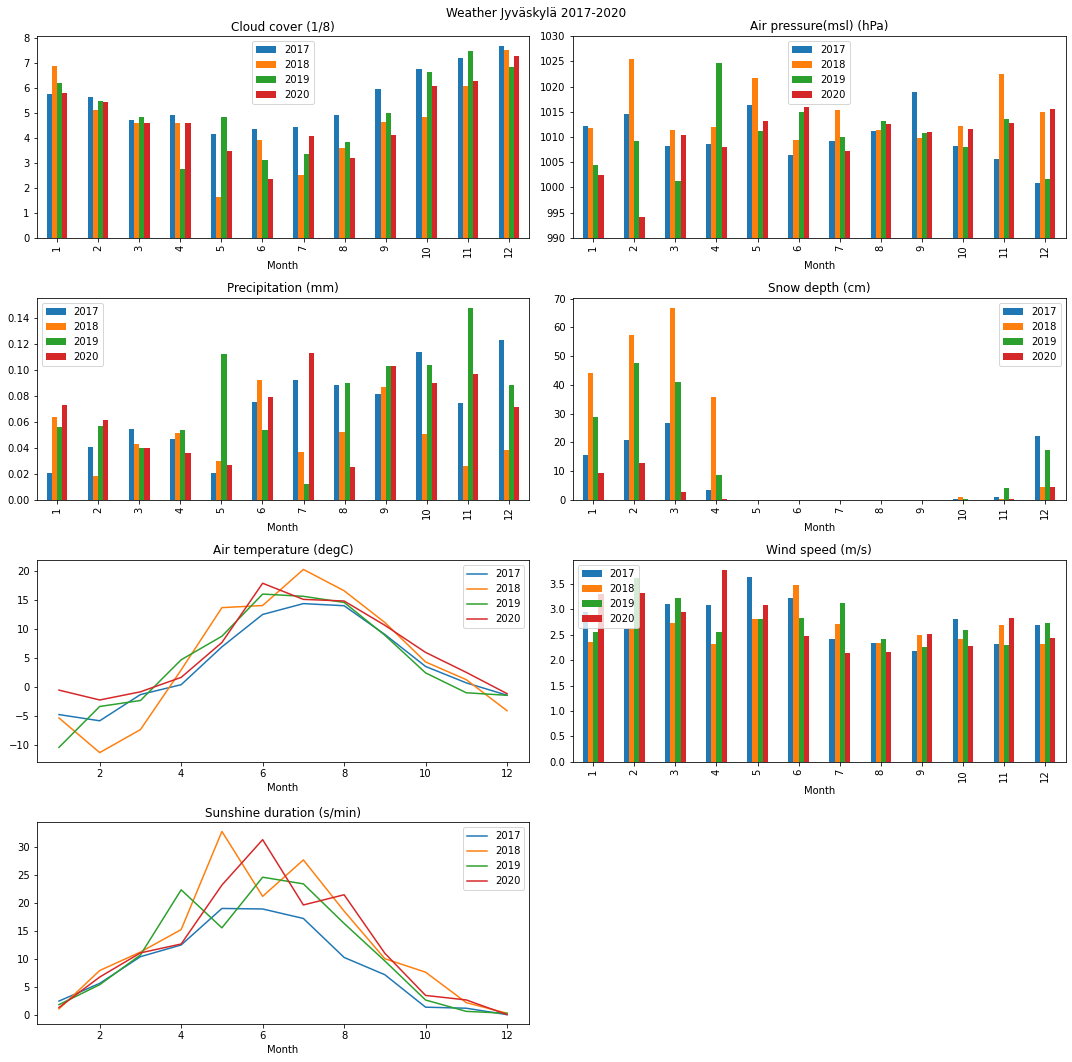

In [9]:
#Weather comparison visualizations
#Jyväskylä 2017-2020
jyv = []
for el in weatherdata_JYV_2017.columns:
       jyv.append(pd.concat([weatherdata_JYV_2017[el],
       weatherdata_JYV_2018[el],
       weatherdata_JYV_2019[el],
       weatherdata_JYV_2020[el]],axis=1, keys=["2017","2018","2019","2020"]))

fig, axes = plt.subplots(4, 2, figsize=(15,15))
jyv[0].plot.bar(title="Cloud cover (1/8)", ax=axes[0,0])
jyv[1].plot.bar(title="Air pressure(msl) (hPa)", ax=axes[0,1])
#change air pressure scale to make the variations visible 
axes[0,1].set_ylim(990, 1030)
jyv[2].plot.bar(title="Precipitation (mm)", ax=axes[1,0])
jyv[3].plot.bar(title="Snow depth (cm)", ax=axes[1,1])
jyv[4].plot.line(title="Air temperature (degC)", ax=axes[2,0])
jyv[5].plot.bar(title="Wind speed (m/s)", ax=axes[2,1],)
jyv[6].plot.line(title="Sunshine duration (s/min)", ax=axes[3,0])

#delete remaining empty plots
fig.delaxes(ax=axes[3,1])

fig.suptitle("Weather Jyväskylä 2017-2020")


plt.tight_layout()
plt.show()
       
    

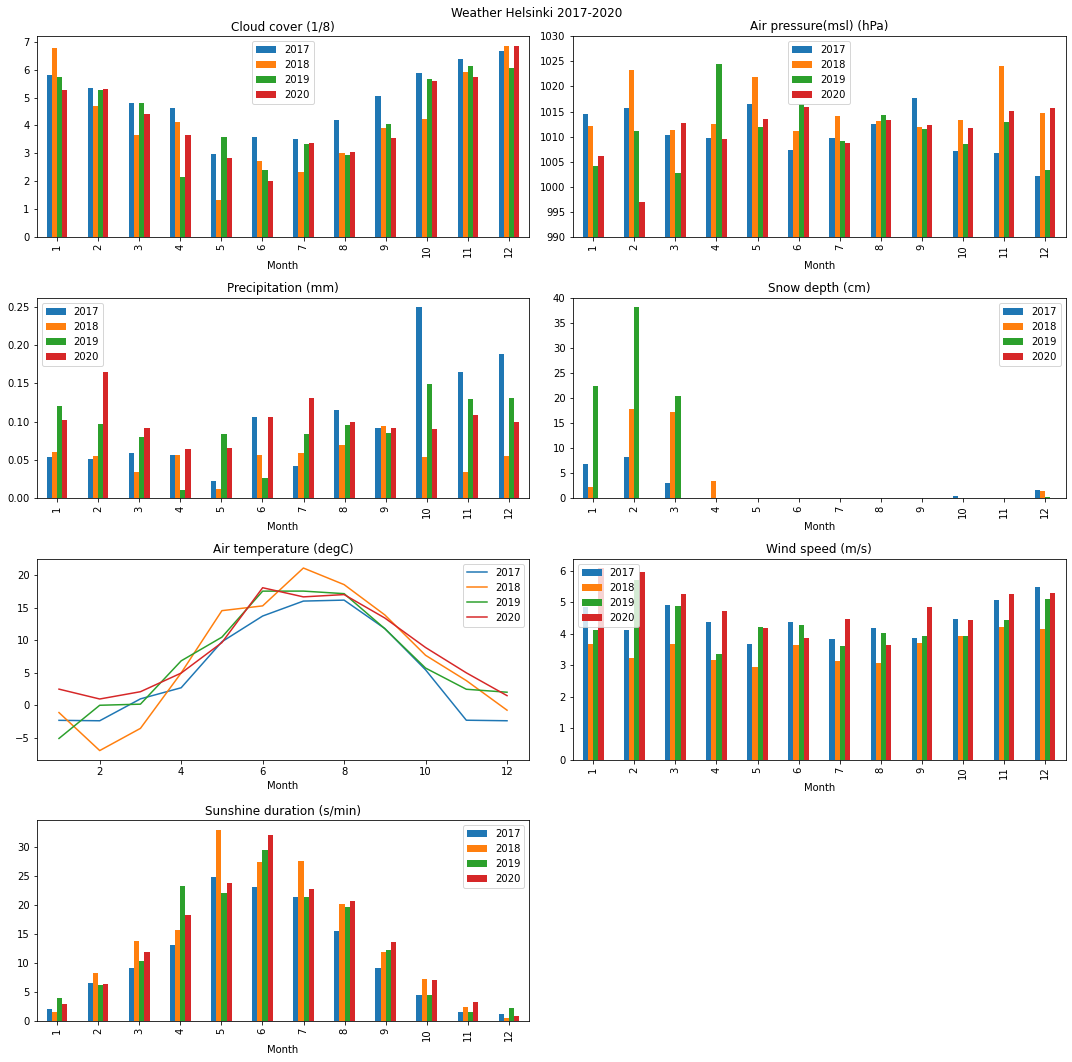

In [10]:
#Helsinki 2017-2020
hel = []
for el in weatherdata_HEL_2017.columns:
       hel.append(pd.concat([weatherdata_HEL_2017[el],
       weatherdata_HEL_2018[el],
       weatherdata_HEL_2019[el],
       weatherdata_HEL_2020[el]],axis=1, keys=["2017","2018","2019","2020"]))

fig, axes = plt.subplots(4, 2, figsize=(15,15))
hel[0].plot.bar(title="Cloud cover (1/8)", ax=axes[0,0])
hel[1].plot.bar(title="Air pressure(msl) (hPa)", ax=axes[0,1])
#change air pressure scale to make the variation more visible 
axes[0,1].set_ylim(990, 1030)
hel[2].plot.bar(title="Precipitation (mm)", ax=axes[1,0])
hel[3].plot.bar(title="Snow depth (cm)", ax=axes[1,1])
hel[4].plot.line(title="Air temperature (degC)", ax=axes[2,0])
hel[5].plot.bar(title="Wind speed (m/s)", ax=axes[2,1])
hel[6].plot.bar(title="Sunshine duration (s/min)", ax=axes[3,0])

#delete remaining empty plots
fig.delaxes(ax=axes[3,1])

fig.suptitle("Weather Helsinki 2017-2020")

plt.tight_layout()
plt.show()

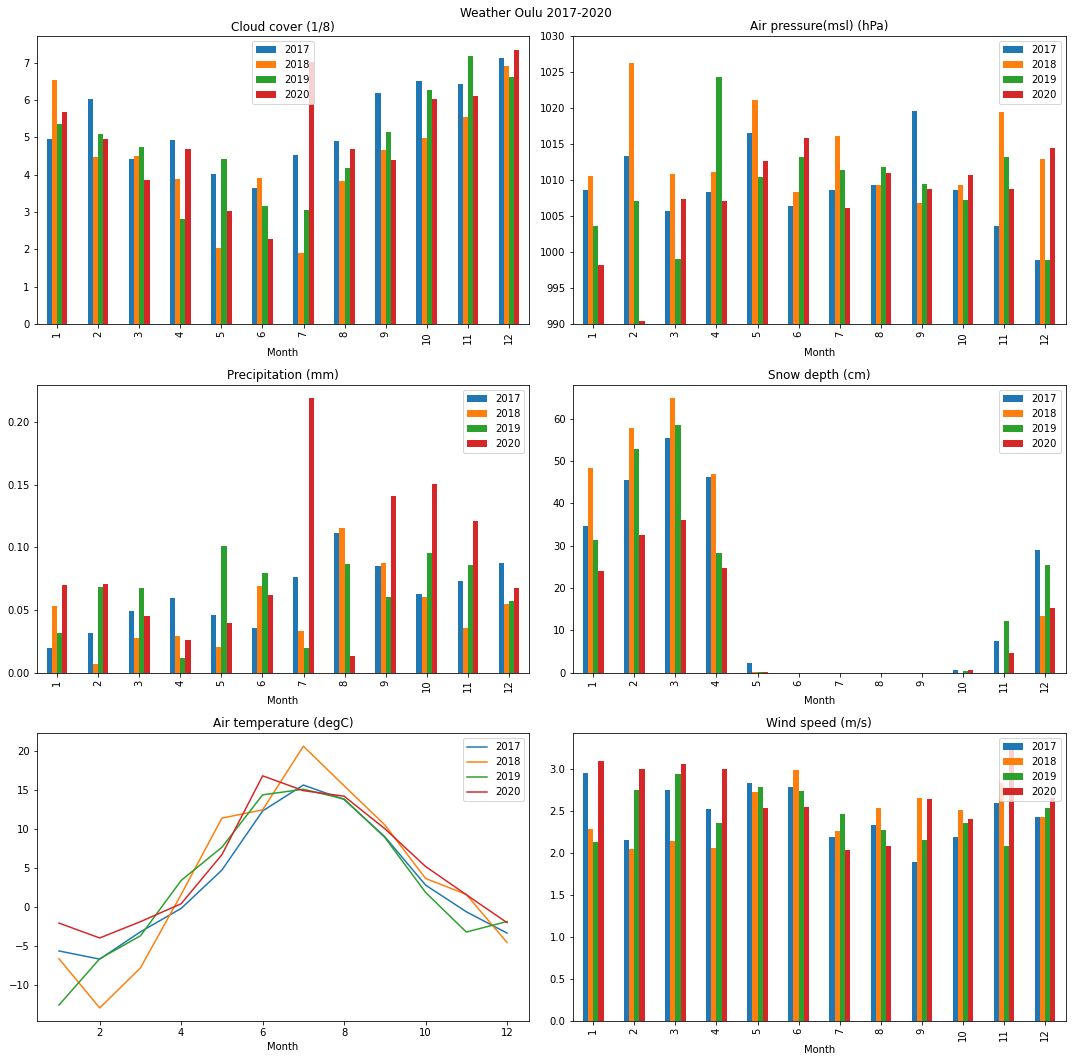

In [11]:
#Oulu 2017-2020
oulu = []
for el in weatherdata_OULU_2017.columns:
       oulu.append(pd.concat([weatherdata_OULU_2017[el],
       weatherdata_OULU_2018[el],
       weatherdata_OULU_2019[el],
       weatherdata_OULU_2020[el]],axis=1, keys=["2017","2018","2019","2020"]))

fig, axes = plt.subplots(3, 2, figsize=(15,15))
oulu[0].plot.bar(title="Cloud cover (1/8)", ax=axes[0,0])
oulu[1].plot.bar(title="Air pressure(msl) (hPa)", ax=axes[0,1])
#change air pressure scale to make the variation more visible 
axes[0,1].set_ylim(990, 1030)
oulu[2].plot.bar(title="Precipitation (mm)", ax=axes[1,0])
oulu[3].plot.bar(title="Snow depth (cm)", ax=axes[1,1])
oulu[4].plot.line(title="Air temperature (degC)", ax=axes[2,0])
oulu[5].plot.bar(title="Wind speed (m/s)", ax=axes[2,1])

fig.suptitle("Weather Oulu 2017-2020")

plt.tight_layout()
plt.show()

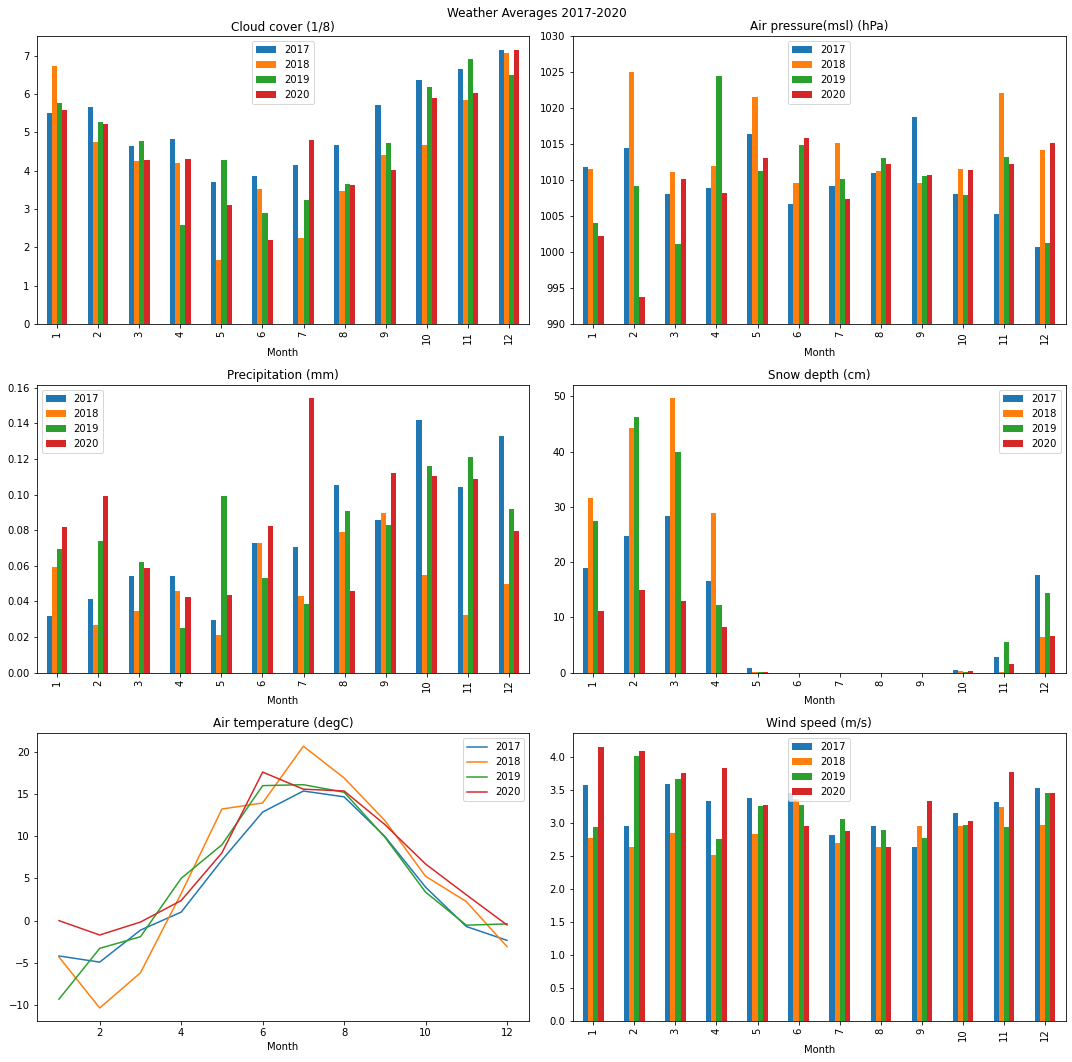

In [12]:
#Averages between cities

#Jyväskylä, Helsinki, Oulu 2017-2020, sunshine duration dropped
w_total2017 = (weatherdata_HEL_2017.drop("Sunshine duration (s/min)", axis=1).astype(float) + weatherdata_JYV_2017.drop("Sunshine duration (s/min)", axis=1).astype(float) + weatherdata_OULU_2017.astype(float)) / 3
w_total2018 = (weatherdata_HEL_2018.drop("Sunshine duration (s/min)", axis=1).astype(float) + weatherdata_JYV_2018.drop("Sunshine duration (s/min)", axis=1).astype(float) + weatherdata_OULU_2018.astype(float)) / 3
w_total2019 = (weatherdata_HEL_2019.drop("Sunshine duration (s/min)", axis=1).astype(float) + weatherdata_JYV_2019.drop("Sunshine duration (s/min)", axis=1).astype(float) + weatherdata_OULU_2019.astype(float)) / 3
w_total2020 = (weatherdata_HEL_2020.drop("Sunshine duration (s/min)", axis=1).astype(float) + weatherdata_JYV_2020.drop("Sunshine duration (s/min)", axis=1).astype(float) + weatherdata_OULU_2020.astype(float)) / 3

avg = []
for el in w_total2017.columns:
       avg.append(pd.concat([w_total2017[el],
       w_total2018[el],
       w_total2019[el],
       w_total2020[el]],axis=1, keys=["2017","2018","2019","2020"]))

fig, axes = plt.subplots(3, 2, figsize=(15,15))
avg[0].plot.bar(title="Cloud cover (1/8)", ax=axes[0,0])
avg[1].plot.bar(title="Air pressure(msl) (hPa)", ax=axes[0,1])
#change air pressure scale to make the variation more visible 
axes[0,1].set_ylim(990, 1030)
avg[2].plot.bar(title="Precipitation (mm)", ax=axes[1,0])
avg[3].plot.bar(title="Snow depth (cm)", ax=axes[1,1])
avg[4].plot.line(title="Air temperature (degC)", ax=axes[2,0])
avg[5].plot.bar(title="Wind speed (m/s)", ax=axes[2,1])

fig.suptitle("Weather Averages 2017-2020")

plt.tight_layout()
plt.show()

In [13]:
def rescale(series: pd.Series):
  return (series-series.mean())/(2*series.std())

In [14]:
# Rescale weather data
columns_to_scale=["Cloud cover (1/8)", "Air pressure(msl) (hPa)", "Precipitation (mm)", "Snow depth (cm)",
                  "Air temperature (degC)", "Wind speed (m/s)", "Sunshine duration (s/min)"]

distribution_HEL = pd.DataFrame(columns=["mean", "std"], index=columns_to_scale)
distribution_JYV = pd.DataFrame(columns=["mean", "std"], index=columns_to_scale)
distribution_OULU = pd.DataFrame(columns=["mean", "std"], index=columns_to_scale)
distribution_total = pd.DataFrame(columns=["mean", "std"], index=columns_to_scale)

for col in columns_to_scale:
  weatherdata_HEL_2017['s'+ col] = rescale(weatherdata_HEL_2017[col])
  weatherdata_HEL_2018['s'+ col] = rescale(weatherdata_HEL_2018[col])
  weatherdata_HEL_2019['s'+ col] = rescale(weatherdata_HEL_2019[col])
  weatherdata_HEL_2020['s'+ col] = rescale(weatherdata_HEL_2020[col])
  distribution_HEL.loc[col] = [pd.concat([weatherdata_HEL_2017[col], weatherdata_HEL_2018[col], \
                                weatherdata_HEL_2019[col], weatherdata_HEL_2020[col]], ignore_index=True).astype(float).mean(), \
                                pd.concat([weatherdata_HEL_2017[col], weatherdata_HEL_2018[col], \
                                weatherdata_HEL_2019[col], weatherdata_HEL_2020[col]], ignore_index=True).astype(float).std()]

  weatherdata_JYV_2017['s'+ col] = rescale(weatherdata_JYV_2017[col])
  weatherdata_JYV_2018['s'+ col] = rescale(weatherdata_JYV_2018[col])
  weatherdata_JYV_2019['s'+ col] = rescale(weatherdata_JYV_2019[col])
  weatherdata_JYV_2020['s'+ col] = rescale(weatherdata_JYV_2020[col])
  distribution_JYV.loc[col] = [pd.concat([weatherdata_JYV_2017[col], weatherdata_JYV_2018[col], \
                                weatherdata_JYV_2019[col], weatherdata_JYV_2020[col]], ignore_index=True).astype(float).mean(), \
                                pd.concat([weatherdata_JYV_2017[col], weatherdata_JYV_2018[col], \
                                weatherdata_JYV_2019[col], weatherdata_JYV_2020[col]], ignore_index=True).astype(float).std()]

  if col != "Sunshine duration (s/min)":
    weatherdata_OULU_2017['s'+ col] = rescale(weatherdata_OULU_2017[col]) 
    weatherdata_OULU_2018['s'+ col] = rescale(weatherdata_OULU_2018[col])
    weatherdata_OULU_2019['s'+ col] = rescale(weatherdata_OULU_2019[col])
    weatherdata_OULU_2020['s'+ col] = rescale(weatherdata_OULU_2020[col])
    distribution_OULU.loc[col] = [pd.concat([weatherdata_OULU_2017[col], weatherdata_OULU_2018[col], \
                                weatherdata_OULU_2019[col], weatherdata_OULU_2020[col]], ignore_index=True).astype(float).mean(), \
                                pd.concat([weatherdata_OULU_2017[col], weatherdata_OULU_2018[col], \
                                weatherdata_OULU_2019[col], weatherdata_OULU_2020[col]], ignore_index=True).astype(float).std()]

    distribution_total.loc[col] = [pd.concat([weatherdata_OULU_2017[col], weatherdata_OULU_2018[col], \
                                weatherdata_OULU_2019[col], weatherdata_OULU_2020[col], \
                                weatherdata_JYV_2017[col], weatherdata_JYV_2018[col], \
                                weatherdata_JYV_2019[col], weatherdata_JYV_2020[col],
                                weatherdata_HEL_2017[col], weatherdata_HEL_2018[col], \
                                weatherdata_HEL_2019[col], weatherdata_HEL_2020[col]], ignore_index=True).astype(float).mean(), \
                                pd.concat([weatherdata_OULU_2017[col], weatherdata_OULU_2018[col], \
                                weatherdata_OULU_2019[col], weatherdata_OULU_2020[col],
                                weatherdata_JYV_2017[col], weatherdata_JYV_2018[col], \
                                weatherdata_JYV_2019[col], weatherdata_JYV_2020[col],
                                weatherdata_HEL_2017[col], weatherdata_HEL_2018[col], \
                                weatherdata_HEL_2019[col], weatherdata_HEL_2020[col]], ignore_index=True).astype(float).std()]
  else:
    distribution_total.loc[col] = [pd.concat([weatherdata_JYV_2017[col], weatherdata_JYV_2018[col], \
                                weatherdata_JYV_2019[col], weatherdata_JYV_2020[col],
                                weatherdata_HEL_2017[col], weatherdata_HEL_2018[col], \
                                weatherdata_HEL_2019[col], weatherdata_HEL_2020[col]], ignore_index=True).astype(float).mean(), \
                                pd.concat([weatherdata_JYV_2017[col], weatherdata_JYV_2018[col], \
                                weatherdata_JYV_2019[col], weatherdata_JYV_2020[col],
                                weatherdata_HEL_2017[col], weatherdata_HEL_2018[col], \
                                weatherdata_HEL_2019[col], weatherdata_HEL_2020[col]], ignore_index=True).astype(float).std()]


In [15]:
def process_data_for_lr(alc_column: str, sun):

    alc_total2020 = alc_data2020[alc_column]
    alc_total2019 = alc_data2019[alc_column]
    alc_total2018 = alc_data2018[alc_column]
    alc_total2017 = alc_data2017[alc_column]
    y = alc_total2017.append([alc_total2018, alc_total2019, alc_total2020], ignore_index=True).astype(float)


    if sun == False:
      # Combine weather data. Sunshine duration is excluded.
        w_total2020 = (weatherdata_HEL_2020.drop("Sunshine duration (s/min)", axis=1).drop("sSunshine duration (s/min)", axis=1).astype(float) +
          weatherdata_JYV_2020.drop("Sunshine duration (s/min)", axis=1).drop("sSunshine duration (s/min)", axis=1).astype(float) +
          weatherdata_OULU_2020.astype(float)) / 3
        w_total2019 = (weatherdata_HEL_2019.drop("Sunshine duration (s/min)", axis=1).drop("sSunshine duration (s/min)", axis=1).astype(float) +
          weatherdata_JYV_2019.drop("Sunshine duration (s/min)", axis=1).drop("sSunshine duration (s/min)", axis=1).astype(float) +
          weatherdata_OULU_2019.astype(float)) / 3
        w_total2018 = (weatherdata_HEL_2018.drop("Sunshine duration (s/min)", axis=1).drop("sSunshine duration (s/min)", axis=1).astype(float) + 
          weatherdata_JYV_2018.drop("Sunshine duration (s/min)", axis=1).drop("sSunshine duration (s/min)", axis=1).astype(float) +
          weatherdata_OULU_2018.astype(float)) / 3
        w_total2017 = (weatherdata_HEL_2017.drop("Sunshine duration (s/min)", axis=1).drop("sSunshine duration (s/min)", axis=1).astype(float) + 
          weatherdata_JYV_2017.drop("Sunshine duration (s/min)", axis=1).drop("sSunshine duration (s/min)", axis=1).astype(float) + 
          weatherdata_OULU_2017.astype(float)) / 3
    else:
        # Combine weather data, Oulu excluded
        w_total2020 = (weatherdata_HEL_2020.astype(float) + weatherdata_JYV_2020.astype(float)) / 2
        w_total2019 = (weatherdata_HEL_2019.astype(float) + weatherdata_JYV_2019.astype(float)) / 2
        w_total2018 = (weatherdata_HEL_2018.astype(float) + weatherdata_JYV_2018.astype(float)) / 2
        w_total2017 = (weatherdata_HEL_2017.astype(float) + weatherdata_JYV_2017.astype(float)) / 2

    X = pd.concat([w_total2017, w_total2018, w_total2019, w_total2020], ignore_index=True).astype(float)

    return (X, y)

In [16]:
# LINEAR REGRESSION OF WHOLE DATA
# statsmodels version

def linear_regression(alc_type: str, sun=False):   
    (X, y) = process_data_for_lr(alc_type, sun)
    df = pd.concat([y, X], axis=1).rename({alc_type: "Alcohol"}, axis=1)
    if sun == True:
        #model = "Alcohol ~ Q('sCloud cover (1/8)') + Q('sAir pressure(msl) (hPa)') + Q('sPrecipitation (mm)') + Q('sSnow depth (cm)') + Q('sAir temperature (degC)') + Q('sWind speed (m/s)') + Q('sSunshine duration (s/min)')"
        model = """Alcohol ~ Q('sCloud cover (1/8)') + Q('sAir pressure(msl) (hPa)') + Q('sPrecipitation (mm)') 
                + Q('sSnow depth (cm)') + Q('sAir temperature (degC)') + Q('sWind speed (m/s)') + Q('sSunshine duration (s/min)')
                + Q('sCloud cover (1/8)'):Q('sAir pressure(msl) (hPa)') + Q('sCloud cover (1/8)'):Q('sPrecipitation (mm)')
                + Q('sCloud cover (1/8)'):Q('sSnow depth (cm)') + Q('sCloud cover (1/8)'):Q('sAir temperature (degC)')
                + Q('sCloud cover (1/8)'):Q('sWind speed (m/s)') + Q('sCloud cover (1/8)'):Q('sSunshine duration (s/min)')
                + Q('sAir pressure(msl) (hPa)'):Q('sPrecipitation (mm)') + Q('sAir pressure(msl) (hPa)'):Q('sSnow depth (cm)')
                + Q('sAir pressure(msl) (hPa)'):Q('sAir temperature (degC)') + Q('sAir pressure(msl) (hPa)'):Q('sWind speed (m/s)')
                + Q('sAir pressure(msl) (hPa)'):Q('sSunshine duration (s/min)') + Q('sPrecipitation (mm)'):Q('sSnow depth (cm)')
                + Q('sPrecipitation (mm)'):Q('sAir temperature (degC)') + Q('sPrecipitation (mm)'):Q('sWind speed (m/s)')
                + Q('sPrecipitation (mm)'):Q('sSunshine duration (s/min)') + Q('sSnow depth (cm)'):Q('sAir temperature (degC)')
                + Q('sSnow depth (cm)'):Q('sWind speed (m/s)') + Q('sSnow depth (cm)'):Q('sSunshine duration (s/min)')
                + Q('sAir temperature (degC)'):Q('sWind speed (m/s)') + Q('sAir temperature (degC)'):Q('sSunshine duration (s/min)')
                + Q('sWind speed (m/s)'):Q('sSunshine duration (s/min)')
        """
    else:
        #model = "Alcohol ~ Q('sCloud cover (1/8)') + Q('sAir pressure(msl) (hPa)') + Q('sPrecipitation (mm)') + Q('sSnow depth (cm)') + Q('sAir temperature (degC)') + Q('sWind speed (m/s)')"
        model = """Alcohol ~ Q('sCloud cover (1/8)') + Q('sAir pressure(msl) (hPa)') + Q('sPrecipitation (mm)') 
                + Q('sSnow depth (cm)') + Q('sAir temperature (degC)') + Q('sWind speed (m/s)')
                + Q('sCloud cover (1/8)'):Q('sAir pressure(msl) (hPa)') + Q('sCloud cover (1/8)'):Q('sPrecipitation (mm)')
                + Q('sCloud cover (1/8)'):Q('sSnow depth (cm)') + Q('sCloud cover (1/8)'):Q('sAir temperature (degC)')
                + Q('sCloud cover (1/8)'):Q('sWind speed (m/s)')
                + Q('sAir pressure(msl) (hPa)'):Q('sPrecipitation (mm)') + Q('sAir pressure(msl) (hPa)'):Q('sSnow depth (cm)')
                + Q('sAir pressure(msl) (hPa)'):Q('sAir temperature (degC)') + Q('sAir pressure(msl) (hPa)'):Q('sWind speed (m/s)')
                + Q('sPrecipitation (mm)'):Q('sSnow depth (cm)')
                + Q('sPrecipitation (mm)'):Q('sAir temperature (degC)') + Q('sPrecipitation (mm)'):Q('sWind speed (m/s)')
                + Q('sSnow depth (cm)'):Q('sAir temperature (degC)')
                + Q('sSnow depth (cm)'):Q('sWind speed (m/s)')
                + Q('sAir temperature (degC)'):Q('sWind speed (m/s)')
        """
    #model = "Alcohol ~ Cloud cover (1/8) + Air pressure(msl) (hPa) + Precipitation (mm) + Snow depth (cm) + Air temperature (degC) + Wind speed (m/s)"
    fit=smf.ols(model, data=df).fit()
    return (fit.summary(), fit.params, fit)

print("Linear regression for total consumption:")

print(linear_regression("Total")[0])
print("------------------------------------------")

Linear regression for total consumption:
                            OLS Regression Results                            
Dep. Variable:                Alcohol   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     5.509
Date:                Tue, 19 Oct 2021   Prob (F-statistic):           3.48e-05
Time:                        17:22:18   Log-Likelihood:                -456.10
No. Observations:                  48   AIC:                             956.2
Df Residuals:                      26   BIC:                             997.4
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

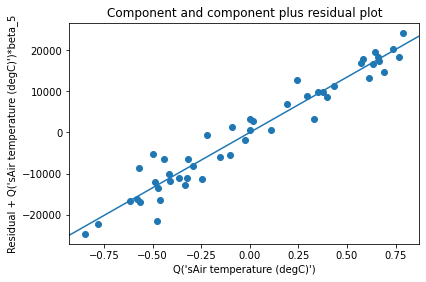

In [17]:
#Total regression graphs
modelAll = linear_regression("Total")[2]
figure = sm.graphics.plot_ccpr(modelAll, 5)
figure.tight_layout(pad=1.0)


In [18]:
print("Linear regression for beer consumption:")
print(linear_regression("Beer")[0])
print("------------------------------------------")

Linear regression for beer consumption:
                            OLS Regression Results                            
Dep. Variable:                Alcohol   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     5.250
Date:                Tue, 19 Oct 2021   Prob (F-statistic):           5.35e-05
Time:                        17:22:19   Log-Likelihood:                -436.63
No. Observations:                  48   AIC:                             917.3
Df Residuals:                      26   BIC:                             958.4
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

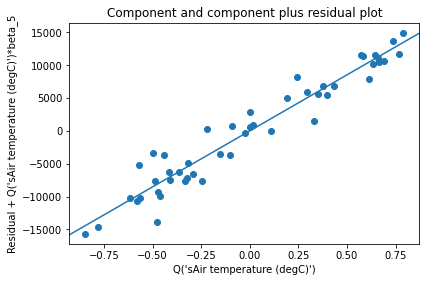

In [19]:
#Beer regression graphs
modelAll = linear_regression("Beer")[2]
figure = sm.graphics.plot_ccpr(modelAll, 5)
figure.tight_layout(pad=1.0)

In [20]:
print("Linear regression for wine consumption:")
print(linear_regression("Wine")[0])
print("------------------------------------------")

Linear regression for wine consumption:
                            OLS Regression Results                            
Dep. Variable:                Alcohol   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     3.515
Date:                Tue, 19 Oct 2021   Prob (F-statistic):            0.00142
Time:                        17:22:19   Log-Likelihood:                -398.52
No. Observations:                  48   AIC:                             841.0
Df Residuals:                      26   BIC:                             882.2
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

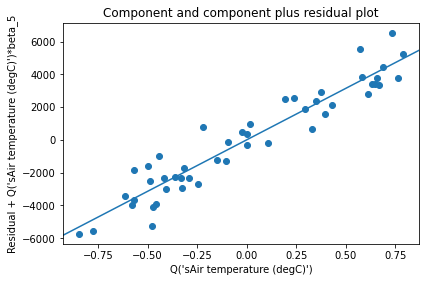

In [21]:
#Wine regression graphs
model = linear_regression("Wine")[2]
figure = sm.graphics.plot_ccpr(model, 5)
figure.tight_layout(pad=1.0)

In [22]:
print("Linear regression for strong wine consumption:")
print(linear_regression("Strong Wine")[0])
print("------------------------------------------")

Linear regression for strong wine consumption:
                            OLS Regression Results                            
Dep. Variable:                Alcohol   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     4.283
Date:                Tue, 19 Oct 2021   Prob (F-statistic):           0.000305
Time:                        17:22:20   Log-Likelihood:                -258.15
No. Observations:                  48   AIC:                             560.3
Df Residuals:                      26   BIC:                             601.5
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

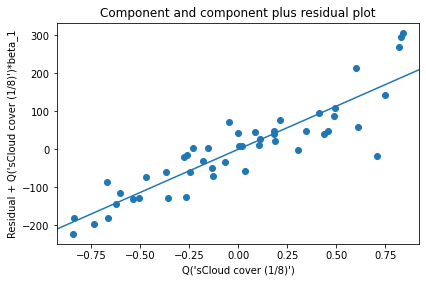

In [23]:
#Strong Wine
model = linear_regression("Strong Wine")[2]
figure = sm.graphics.plot_ccpr(model, 1)
figure.tight_layout(pad=1.0)

In [24]:
print("Linear regression for spirits consumption:")
print(linear_regression("Spirits")[0])
print("------------------------------------------")

Linear regression for spirits consumption:
                            OLS Regression Results                            
Dep. Variable:                Alcohol   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                 -0.052
Method:                 Least Squares   F-statistic:                    0.8897
Date:                Tue, 19 Oct 2021   Prob (F-statistic):              0.604
Time:                        17:22:20   Log-Likelihood:                -405.68
No. Observations:                  48   AIC:                             855.4
Df Residuals:                      26   BIC:                             896.5
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

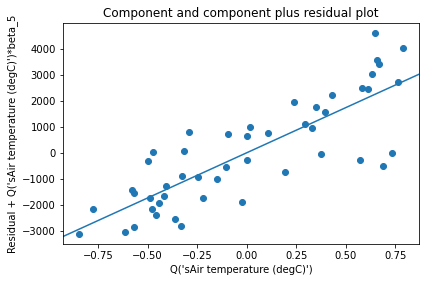

In [25]:
#Spirits
model = linear_regression("Spirits")[2]
figure = sm.graphics.plot_ccpr(model, 5)
figure.tight_layout(pad=1.0)

In [26]:
#HEL - JYV COMBO 
print("Linear regression for total consumption: Helsinki Jyväskylä")

print(linear_regression("Total", sun=True)[0])
print("------------------------------------------")

Linear regression for total consumption: Helsinki Jyväskylä
                            OLS Regression Results                            
Dep. Variable:                Alcohol   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     6.057
Date:                Tue, 19 Oct 2021   Prob (F-statistic):           7.50e-05
Time:                        17:22:20   Log-Likelihood:                -441.71
No. Observations:                  48   AIC:                             941.4
Df Residuals:                      19   BIC:                             995.7
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------

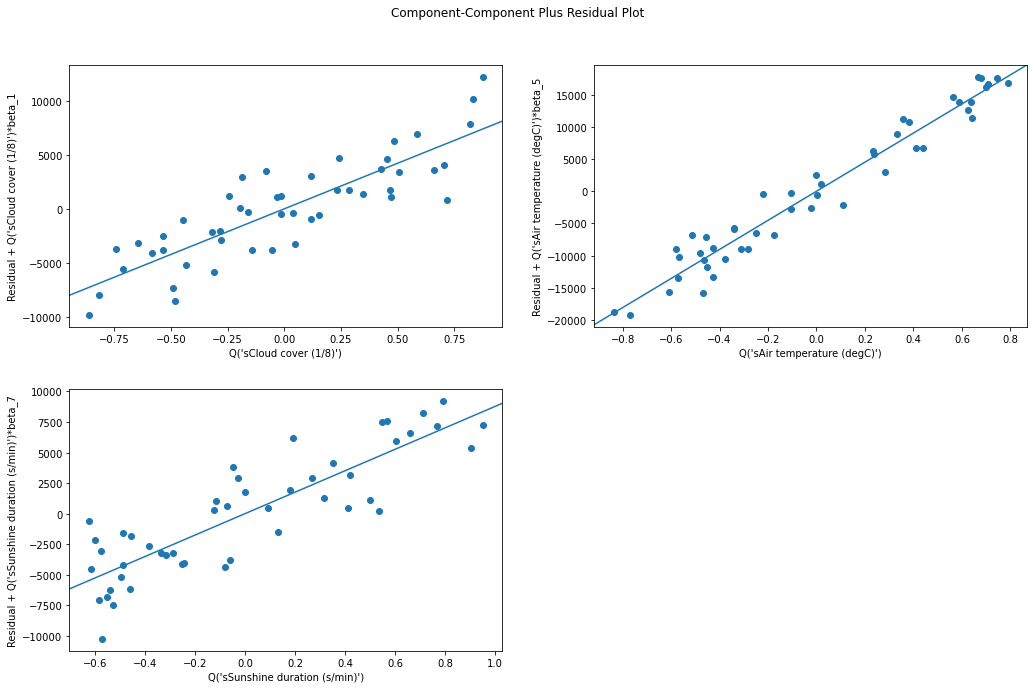

In [27]:
model = linear_regression("Total", sun=True)[2]
size = plt.figure(figsize=(15,10))
figure = sm.graphics.plot_ccpr_grid(model, [1,5,7], fig=size)
figure.tight_layout(pad=3.0)

33479.24391792034 8875.428425405687 202.20424441343545 4756.0685581154285


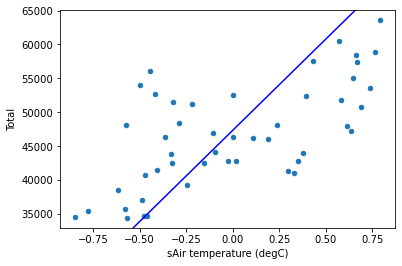

In [28]:
# Alcohol as a function of temperature

beer = linear_regression("Beer", False)
wine = linear_regression("Wine", False)
s_wine = linear_regression("Strong Wine", False)
spirits = linear_regression("Spirits", False)
total = linear_regression("Total", False)

beer_p = beer[1]
wine_p = wine[1]
s_wine_p = s_wine[1]
spirits_p = spirits[1]
total_p = total[1]

beer_int = beer_p.Intercept
wine_int = wine_p.Intercept
s_wine_int = s_wine_p.Intercept
spirits_int = spirits_p.Intercept
total_int = total_p.Intercept

beer_slope = beer_p["Q('sAir temperature (degC)')"]
wine_slope = wine_p["Q('sAir temperature (degC)')"]
s_wine_slope = s_wine_p["Q('sAir temperature (degC)')"]
spirits_slope = spirits_p["Q('sAir temperature (degC)')"]
total_slope = total_p["Q('sAir temperature (degC)')"]

X, y = process_data_for_lr("Total", False)
data = pd.concat([y, X["sAir temperature (degC)"]], axis=1)
data.plot.scatter("sAir temperature (degC)", "Total")

abline_plot(intercept = total_int, slope = total_slope,
    ax=plt.gca(), color="blue", label="beer")
abline_plot(intercept = wine_int, slope = wine_slope,
    ax=plt.gca(), color="green", label="wine")
abline_plot(intercept = s_wine_int, slope = s_wine_slope,
    ax=plt.gca(), color="magenta", label="strong wine")
abline_plot(intercept = spirits_int, slope = spirits_slope,
    ax=plt.gca(), color="red", label="spirits")

print(beer_int, wine_int, s_wine_int, spirits_int)

#plt.legend()


In [48]:
def predict_alcohol(alc_type="Total", cloud=distribution_total.iloc[0], pressure=distribution_total.iloc[1], rain=distribution_total.iloc[2], snow=distribution_total.iloc[3], temp=distribution_total.iloc[4], wind=distribution_total.iloc[5], sun=distribution_total.iloc[6]):
    
    fit = linear_regression(alc_type, sun=True)[2]
    params = fit.params
    # Normalize the given values
    cloud = (cloud - distribution_total.iloc[0]["mean"]) / (2 * distribution_total.iloc[0]["std"])
    pressure = (pressure - distribution_total.iloc[1]["mean"]) / (2 * distribution_total.iloc[1]["std"])
    rain = (rain - distribution_total.iloc[2]["mean"]) / (2 * distribution_total.iloc[2]["std"])
    snow = (snow - distribution_total.iloc[3]["mean"]) / (2 * distribution_total.iloc[3]["std"])
    temp = (temp - distribution_total.iloc[4]["mean"]) / (2 * distribution_total.iloc[4]["std"])
    wind = (wind - distribution_total.iloc[5]["mean"]) / (2 * distribution_total.iloc[5]["std"])
    sun = (sun - distribution_total.iloc[6]["mean"]) / (2 * distribution_total.iloc[6]["std"])
    point = pd.DataFrame({"sCloud cover (1/8)": cloud, "sAir pressure(msl) (hPa)": pressure, "sPrecipitation (mm)": rain, \
            "sSnow depth (cm)": snow, "sAir temperature (degC)": temp, "sWind speed (m/s)": wind, "sSunshine duration (s/min)": sun}, index=[0])
    predicted = float(fit.predict(point)[0])
    return predicted


print(predict_alcohol("Total", 5, 1000, 0.1, 2, -2, 3.5, 10))

38487.03114625548
                                  mean       std
Cloud cover (1/8)             4.419846   1.44525
Air pressure(msl) (hPa)    1011.997932  5.437874
Precipitation (mm)            0.086464   0.04635
Snow depth (cm)               3.001398  7.570873
Air temperature (degC)        7.119053  7.643784
Wind speed (m/s)               4.27495  0.756235
Sunshine duration (s/min)    12.943294  9.533923
